In [1]:
# %pip  install  -U  Lightautoml
# %pip install torch
# %pip install transformers
# %pip install nltk
# %pip install gensim
# %pip install scikit-learn==1.3.0

In [2]:
import pickle

import numpy as np
import pandas as pd
import torch
# LightAutoML presets, task and report generation
from lightautoml.automl.presets.tabular_presets import TabularAutoML
from lightautoml.tasks import Task
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split

In [3]:
# # Производим десериализацию и извлекаем модель из файла формата pkl
# with open('data/df_cleaned.pkl', 'rb') as pkl_file:
#     df = pickle.load(pkl_file)

df = pd.read_csv('data/df.csv')
df.head()

,baths,sqft,beds,target,city_is_capital,city_is_million,city_is_big,city_is_large,claster,distance_capital,...,heat_bool,air_conditioner,ceiling_fan,cool_bool,Garage,Carport,Parking_lot,PublicSchoolOverallRanking,HDI (2021),Crime Rate
0,3.5,2900.0,4.0,418000.0,False,False,False,False,197.0,100.137884,...,True,True,False,False,False,False,False,43.0,0.907,4.872
1,3.0,1947.0,3.0,310000.0,False,False,False,True,29.0,436.589228,...,False,False,False,False,False,False,False,13.0,0.940,5.759
2,NaN,897.0,2.0,209000.0,False,True,False,False,47.0,149.770696,...,True,False,False,True,False,False,False,9.0,0.923,3.678
3,NaN,1507.0,NaN,181500.0,False,False,False,False,67.0,380.395709,...,True,True,False,True,False,False,False,42.0,0.911,3.922
4,2.0,3588.0,3.0,244900.0,False,False,False,False,31.0,178.458605,...,True,False,False,True,False,False,False,16.0,0.930,3.700


In [4]:
object_columns = [s for s in df.columns if df[s].dtypes == 'object']

df = df.drop(object_columns, axis = 1)
# df = df.drop('zipcode', axis = 1)
df = df.dropna()

In [5]:
df.columns

Index(['baths', 'sqft', 'beds', 'target', 'city_is_capital', 'city_is_million',
       'city_is_big', 'city_is_large', 'claster', 'distance_capital',
       'distance_million', 'firepl', '1_level', '2_level', '3_level',
       '4_level', 'multi_level', 'multi_family', 'condo', 'Farms/Ranches',
       'Townhouse', 'Single Family Home', 'pool', 'auction', 'foreclosure',
       'new', 'school_rating_mean', 'number_school', 'school_distance_mean',
       'Year_built', 'lotsize', 'Remodeled', 'forced_air_heating',
       'gas_heating', 'electric_heating', 'pump_heating', 'central_heating',
       'heat_bool', 'air_conditioner', 'ceiling_fan', 'cool_bool', 'Garage',
       'Carport', 'Parking_lot', 'PublicSchoolOverallRanking', 'HDI (2021)',
       'Crime Rate'],
      dtype='object')

In [5]:
sorted(df.columns,key=str.lower)

['1_level',
 '2_level',
 '3_level',
 '4_level',
 'air_conditioner',
 'auction',
 'baths',
 'beds',
 'Carport',
 'ceiling_fan',
 'central_heating',
 'city_is_big',
 'city_is_capital',
 'city_is_large',
 'city_is_million',
 'claster',
 'condo',
 'cool_bool',
 'Crime Rate',
 'distance_capital',
 'distance_million',
 'electric_heating',
 'Farms/Ranches',
 'firepl',
 'forced_air_heating',
 'foreclosure',
 'Garage',
 'gas_heating',
 'HDI (2021)',
 'heat_bool',
 'lotsize',
 'multi_family',
 'multi_level',
 'new',
 'number_school',
 'Parking_lot',
 'pool',
 'PublicSchoolOverallRanking',
 'pump_heating',
 'Remodeled',
 'school_distance_mean',
 'school_rating_mean',
 'Single Family Home',
 'sqft',
 'target',
 'Townhouse',
 'Year_built']

In [6]:
N_THREADS = 6
N_FOLDS = 4
RANDOM_STATE = 42
TEST_SIZE = 0.2
TIMEOUT = 5000
TARGET_NAME = 'target'

np.random.seed(RANDOM_STATE)
torch.set_num_threads(N_THREADS)
task = Task('reg', loss = 'mae', metric = 'mae')
roles = {
    'target': TARGET_NAME,
    'drop':object_columns,
        }

df_train, df_test = train_test_split(
                                    df,
                                    test_size=TEST_SIZE,
                                    random_state=RANDOM_STATE,
                                    )

automl = TabularAutoML(
                    task = task,
                    timeout = TIMEOUT,
                    cpu_limit = N_THREADS,
                    reader_params = {'n_jobs': N_THREADS,
                                    'cv': N_FOLDS,
                                    'random_state': RANDOM_STATE}
                    )

oof_pred = automl.fit_predict(df_train,
                                roles = roles,
                                verbose = 1)

[17:50:56] Stdout logging level is INFO.
[17:50:56] Copying TaskTimer may affect the parent PipelineTimer, so copy will create new unlimited TaskTimer
[17:50:56] Task: reg

[17:50:56] Start automl preset with listed constraints:
[17:50:56] - time: 5000.00 seconds
[17:50:56] - CPU: 6 cores
[17:50:56] - memory: 16 GB

[17:50:56] Train data shape: (159244, 47)

[17:51:04] Layer 1 train process start. Time left 4992.28 secs
[17:51:16] Start fitting Lvl_0_Pipe_0_Mod_0_LinearL2 ...
[17:51:37] Fitting Lvl_0_Pipe_0_Mod_0_LinearL2 finished. score = -93871.8822649329
[17:51:37] Lvl_0_Pipe_0_Mod_0_LinearL2 fitting and predicting completed
[17:51:37] Time left 4959.36 secs

[17:51:51] Selector_LightGBM fitting and predicting completed
[17:52:05] Start fitting Lvl_0_Pipe_1_Mod_0_LightGBM ...
[17:53:24] Fitting Lvl_0_Pipe_1_Mod_0_LightGBM finished. score = -66446.38781361456
[17:53:24] Lvl_0_Pipe_1_Mod_0_LightGBM fitting and predicting completed
[17:53:24] Start hyperparameters optimization for Lvl_

In [7]:
# # Производим сериализацию и записываем результат в файл формата pkl
with open(r'web\app\models\automl.pkl', 'wb') as output:
    pickle.dump(automl, output)

In [7]:
# D:\olga2\Downloads\final_1\web\app\models\automl.pkl
with open(r'D:\olga2\Downloads\final_1\web\app\models\automl.pkl', 'rb') as pkl_file:
    automl = pickle.load(pkl_file)

In [8]:
test_pred = automl.predict(df_test)

In [9]:
oof_pred.data[:, 0]

array([110786.875, 481702.66 , 145851.95 , ..., 274222.9  , 244308.06 ,
       436097.88 ], dtype=float32)

In [10]:
print(f'HOLDOUT score: {mean_absolute_error(df_test[TARGET_NAME].to_numpy(), test_pred.data[:, 0])}')

HOLDOUT score: 59393.349358280306


In [11]:
print(f'HOLDOUT score: {mean_absolute_percentage_error(df_test[TARGET_NAME].to_numpy(), test_pred.data[:, 0])}')

HOLDOUT score: 0.1909594568584277


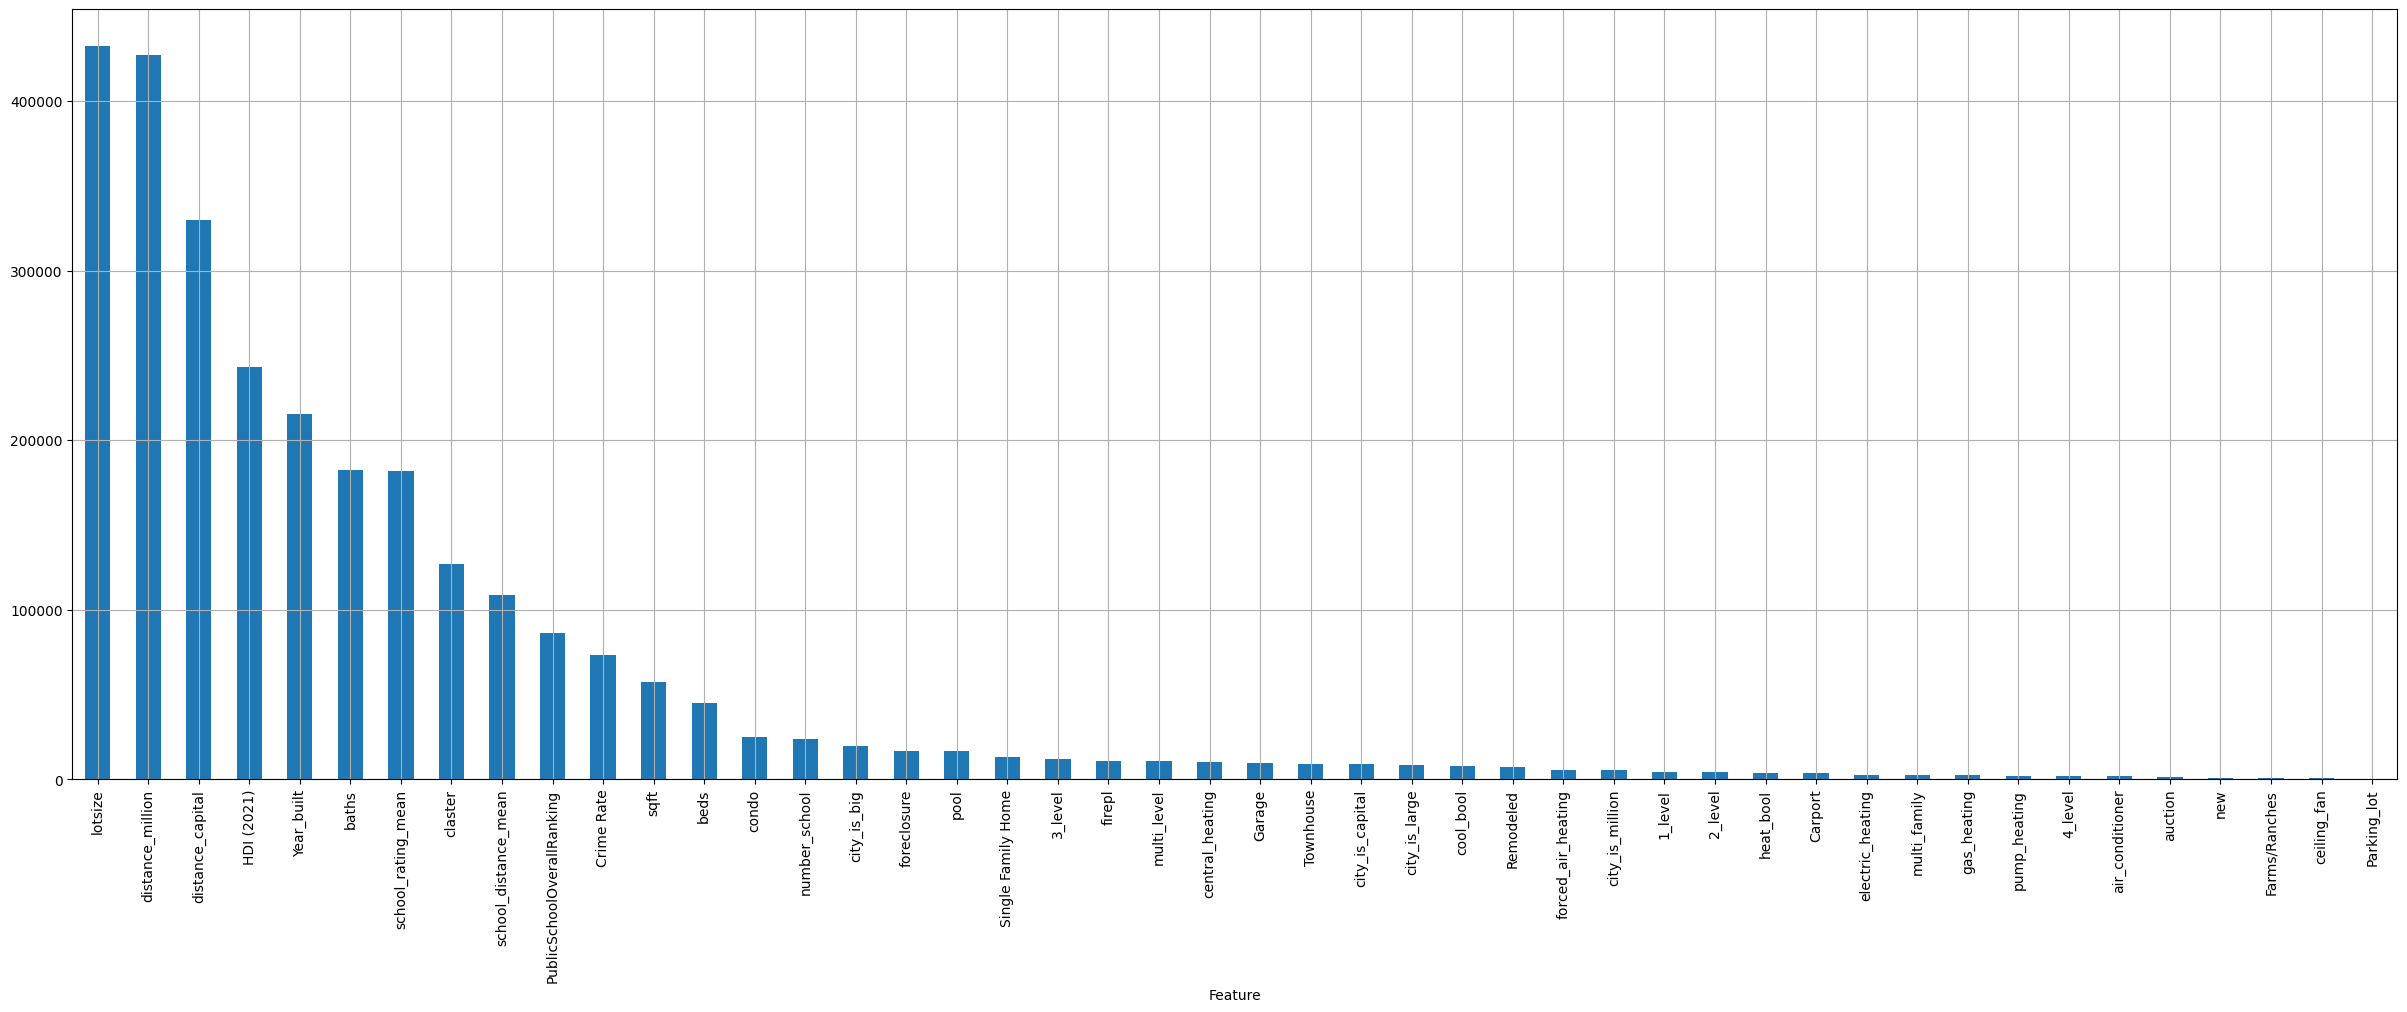

In [12]:
# Fast feature importances calculation
fast_fi = automl.get_feature_scores('fast')
fast_fi.set_index('Feature')['Importance'].plot.bar(figsize = (30, 10), grid = True);

In [13]:
%%time

# Accurate feature importances calculation (Permutation importances) -  can take long time to calculate on bigger datasets
accurate_fi = automl.get_feature_scores('accurate', df_test, silent = False)

CPU times: total: 2h 49min 24s
Wall time: 31min 6s


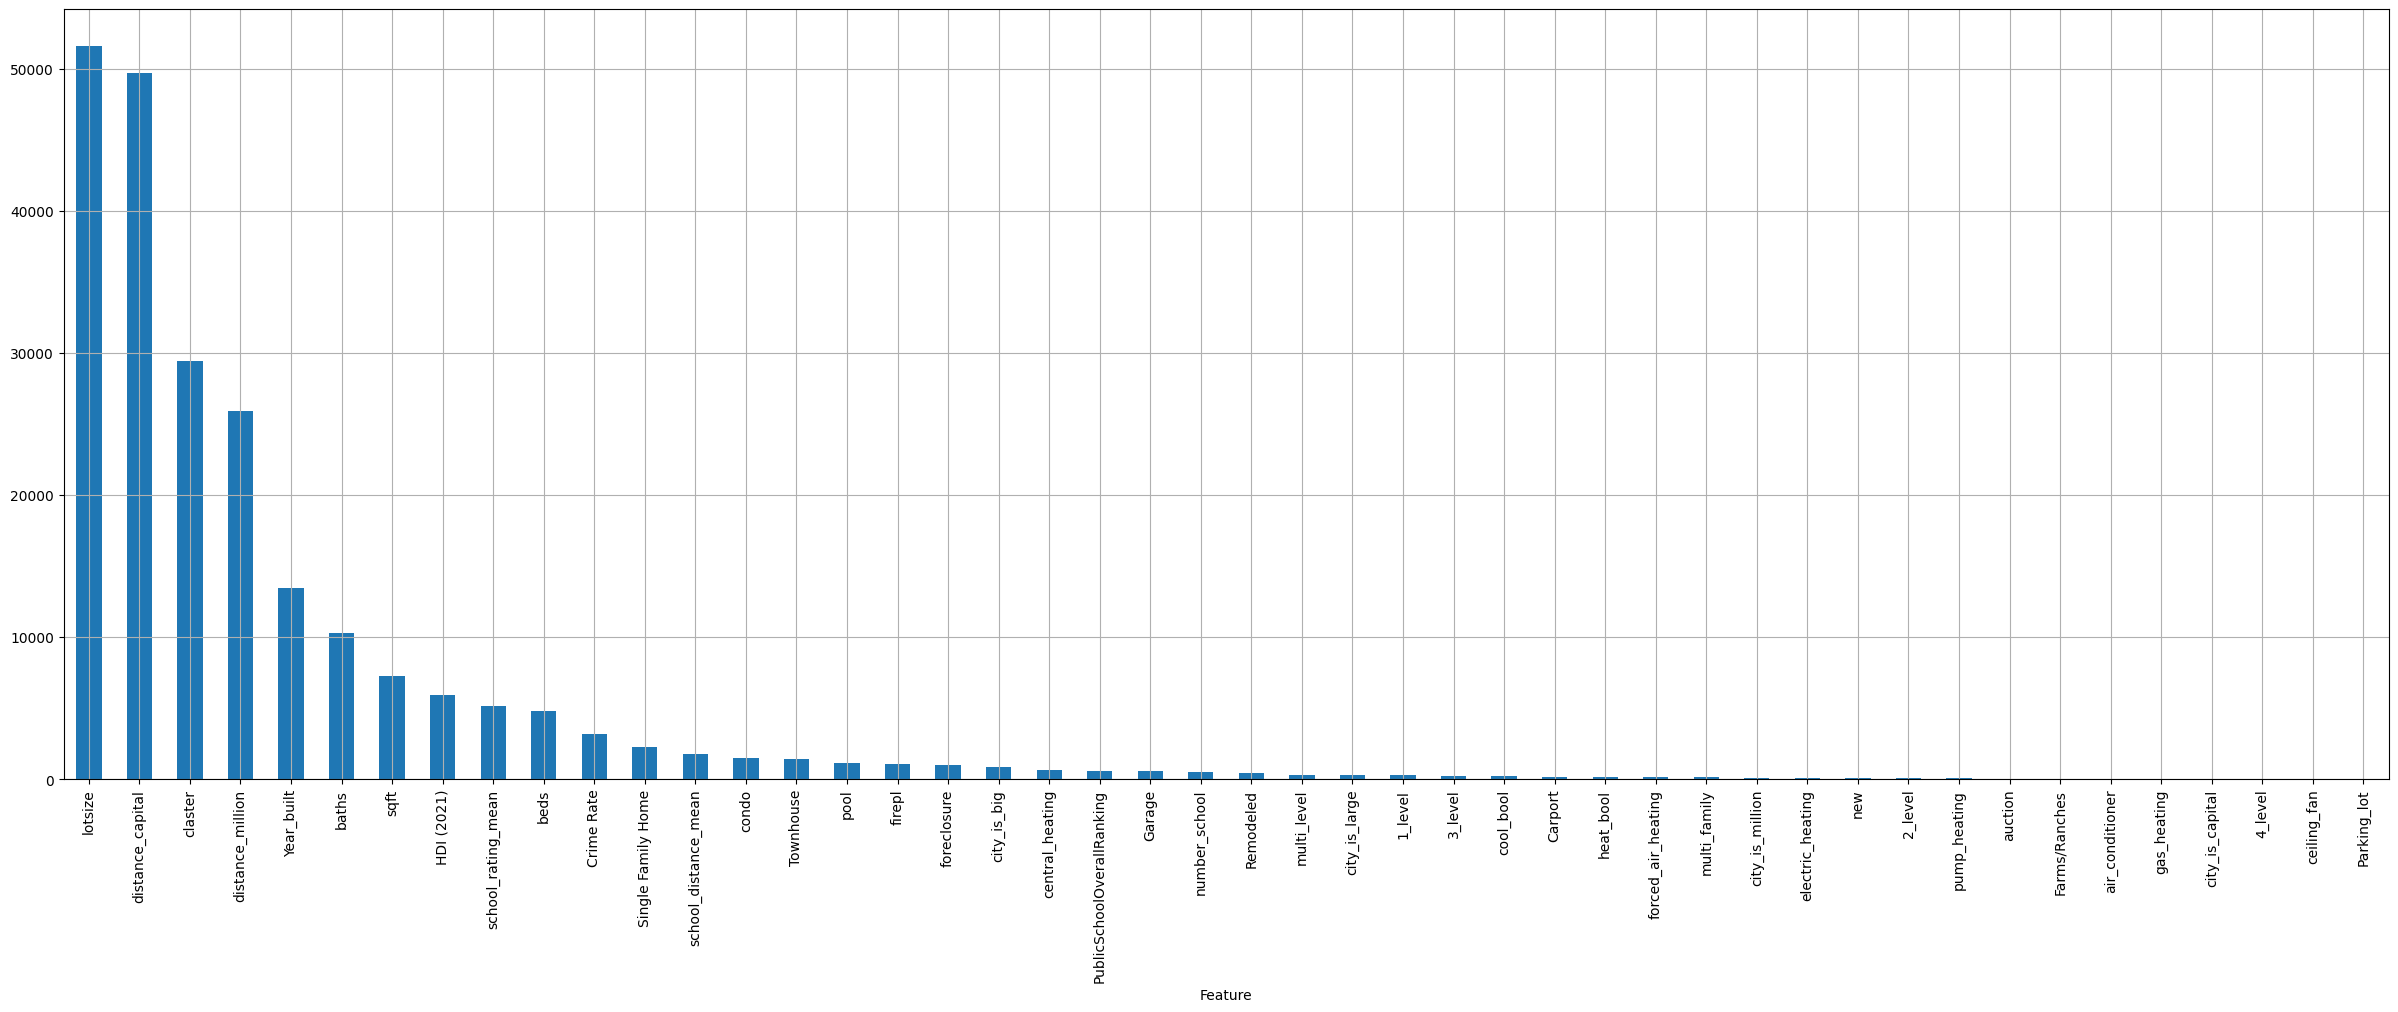

In [14]:
accurate_fi.set_index('Feature')['Importance'].plot.bar(figsize = (30, 10), grid = True);